# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
def outlier_removal(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]
    return df_new

In [30]:
data = pd.read_csv("Credit_Risk.csv")

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [32]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
Imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
Imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
Imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [34]:
data.loc[:, ["LoanAmount"]] = Imp_mean.fit_transform(data.loc[:, ["LoanAmount"]])

In [35]:
data.loc[:, ["Gender", "Married", "Dependents", "Self_Employed", "Credit_History"]] = Imp_mode.fit_transform(data.loc[:, ["Gender", "Married", "Dependents", "Self_Employed", "Credit_History"]])

In [36]:
data.iloc[:, 9:10] = Imp_median.fit_transform(data.iloc[:, 9:10])

In [42]:
data.iloc[:, 6:9] = outlier_removal(data.iloc[:, 6:9])

In [9]:
data.iloc[:, 1:6] = pd.get_dummies(data.iloc[:, 1:6])

In [10]:
data.iloc[:, 11:12] = pd.get_dummies(data.iloc[:, 11:12])

In [37]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


# Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

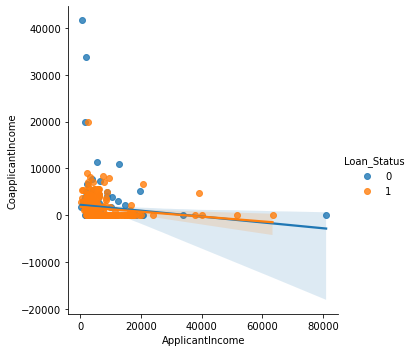

In [38]:
sns.lmplot(data = data, x="ApplicantIncome", y="CoapplicantIncome", hue="Loan_Status")

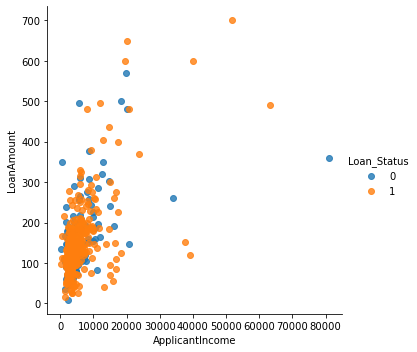

In [39]:
sns.lmplot(data = data, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status", fit_reg=False)

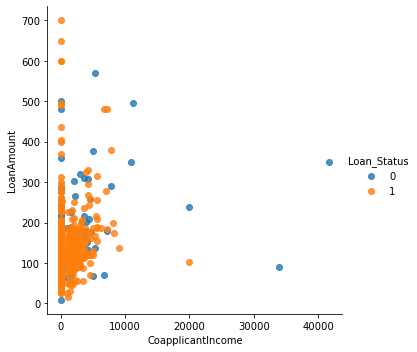

In [40]:
sns.lmplot(data = data, x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status", fit_reg=False)

<AxesSubplot:xlabel='Gender', ylabel='count'>

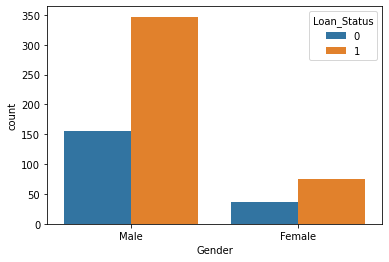

In [41]:
sns.countplot(data=data, x="Gender", hue="Loan_Status")

<AxesSubplot:xlabel='Married', ylabel='count'>

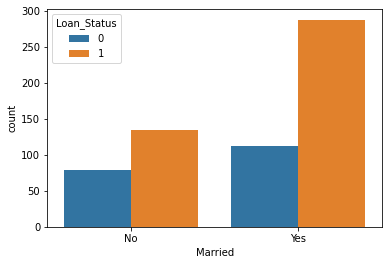

In [42]:
sns.countplot(data=data, x="Married", hue="Loan_Status")

<AxesSubplot:xlabel='Dependents', ylabel='count'>

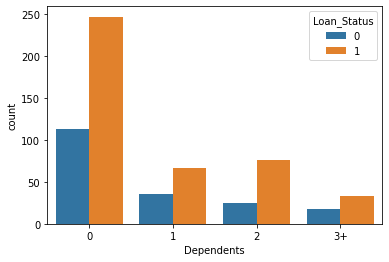

In [43]:
sns.countplot(data=data, x="Dependents", hue="Loan_Status")

<AxesSubplot:xlabel='Education', ylabel='count'>

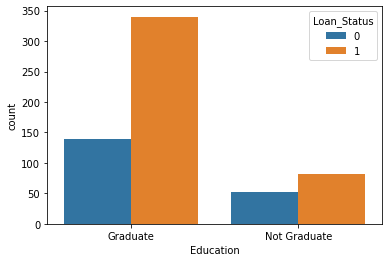

In [44]:
sns.countplot(data=data, x="Education", hue="Loan_Status")

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

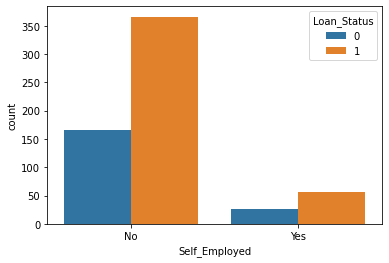

In [45]:
sns.countplot(data=data, x="Self_Employed", hue="Loan_Status")

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

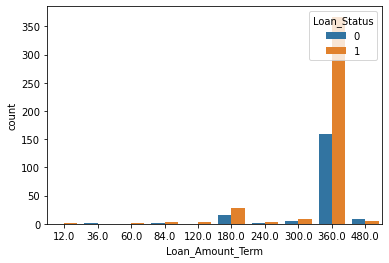

In [46]:
sns.countplot(data=data, x="Loan_Amount_Term", hue="Loan_Status")

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

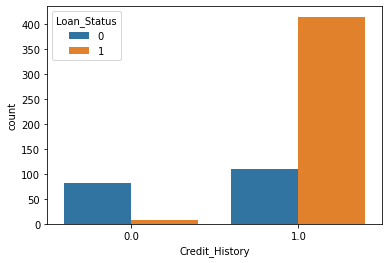

In [47]:
sns.countplot(data=data, x="Credit_History", hue="Loan_Status")

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

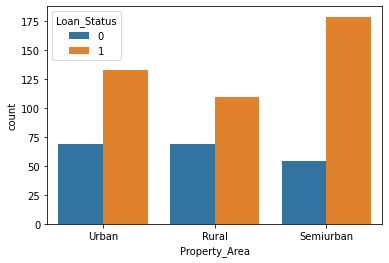

In [48]:
sns.countplot(data=data, x="Property_Area", hue="Loan_Status")

## Credit Histroy Plays an Important Role in Loan Approval by observing the Plots.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

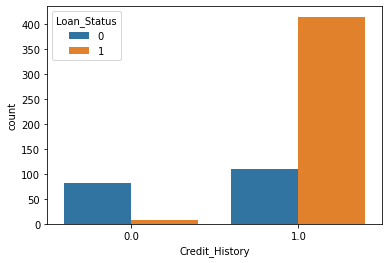

In [47]:
sns.countplot(data=data, x="Credit_History", hue="Loan_Status")